#*Language Detection and Translation*


This code will help in detecting the language provided by the user and can also translate it into a language of user choice.


---
---
### Importing the libraries

In [6]:
import pandas as pd
import numpy as np

## Reading the dataset Language_Detection.csv
*The dataset used for this project, Language_Detection, comprises 15+ languages and
comprises 10,000+ entries. This dataset was obtained from kaggle.*

In [8]:
import io
df = pd.read_csv('LangDataset.csv')

### Printing the first 10 records in the dataset

In [9]:
df.head(10)


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


### Printing the last 10 records in the dataset

In [10]:
df.tail(10)

,Text,Language
10327,ಗಾಡಿಯಲ್ಲಿ ಮನೆಯಲ್ಲಿ ನಾರ್ಸಿಸ್ ಅವಳು ಮನೆಗೆ ತಲುಪಿದಾ...,Kannada
10328,ಅವಳು ಮನೆಯಲ್ಲಿ ಕುಳಿತಿದ್ದ ತನ್ನ ತಾಯಿಯನ್ನು ತಬ್ಬಿಕೊ...,Kannada
10329,ಓಹ್ ತಾಯಿ ನಾನು ನಿನ್ನನ್ನು ತುಂಬಾ ಪ್ರೀತಿಸುತ್ತೇನೆ ಮ...,Kannada
10330,"ಅವನು ಸುಂದರವಾಗಿದ್ದನು, ಅವನು ನನ್ನ ಬಗ್ಗೆ ಅಷ್ಟಾಗಿ ಕ...",Kannada
10331,ಓಹ್ ಇಲ್ಲ ನೀವು ನೋಡಿದಾಗಿನಿಂದ ಇದು ಸರಿಯಾಗಿದೆ.,Kannada
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


### Information about the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


### Counting the unique records in the "Language" column
*We have 17 languages and their corresponding unique words are shown below.*


In [12]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

### Printing the shape of the dataset

In [13]:
X = df["Text"]
y = df["Language"]
print(df.shape)

(10337, 2)


### Converting the categorical variables into numerical variables

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

---
---

#*Creating a list for appending the preprocessed text*

To help in cleaning up the data we we removed the unwanted characters such as punctuation marks, numbers,symbols and special characters so that we can extract only the required text from the dataset

*We convert all the text to lowercase characters*

In [15]:
import re
df_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', str(text))
        text = re.sub(r'[[]]', ' ', str(text))
        text = text.lower()
        df_list.append(text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Possible nested set at position 1
  """


### To format the text into vectors

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_list).toarray()
X.size

361143769

---
---
#*Training test and and Testing set for x and y*

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


## MultinomialNB model

In [18]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

## Prediction

In [19]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

---
---
# *Calculating the accuracy , confusion matrix and classfication report*

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Accuracy Score
*The accuracy found out while predicting the languages is found to be
97.77756%*

In [21]:
ac = accuracy_score(y_test, y_pred)
print("The accuracy comes to : ",ac)

The accuracy comes to :  0.9777562862669246


## Confusion Matrix
*The confusion matrix displayed here gives information on how the languages
are being compared and the similarity of one language with another.*

In [22]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n\n",cm)

Confusion Matrix : 

 [[ 94   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  84   0   0   2   0   0   0   0   0   0   1   0   0   3   0   0]
 [  0   0 116   2   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 293   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   1   2 212   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0  81   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0  71   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 128   0   0   0   0   2   0   0   0]
 [  0   1   0   1   0   0   0   0   0  63   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0 124   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0 152   0   3   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0 132   0   0   0   0]
 [  0   1   0   3   0   0   0   0   0   0   0   0   0 1

## Classification Report

In [23]:
cr = classification_report(y_test, y_pred)
print ("Classification Report : \n\n",cr)

Classification Report : 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        99
           1       0.98      0.93      0.95        90
           2       0.99      0.97      0.98       119
           3       0.92      1.00      0.96       294
           4       0.99      0.98      0.99       216
           5       0.99      0.98      0.98        83
           6       1.00      1.00      1.00        71
           7       1.00      0.90      0.95        10
           8       0.98      0.98      0.98       130
           9       1.00      0.97      0.98        65
          10       1.00      0.98      0.99       127
          11       0.99      0.97      0.98       156
          12       1.00      0.98      0.99       135
          13       0.95      0.97      0.96       148
          14       0.97      0.99      0.98       149
          15       1.00      1.00      1.00        90
          16       1.00      0.94      0.97        86


## Plotting the confusion matrix onto a heatmap

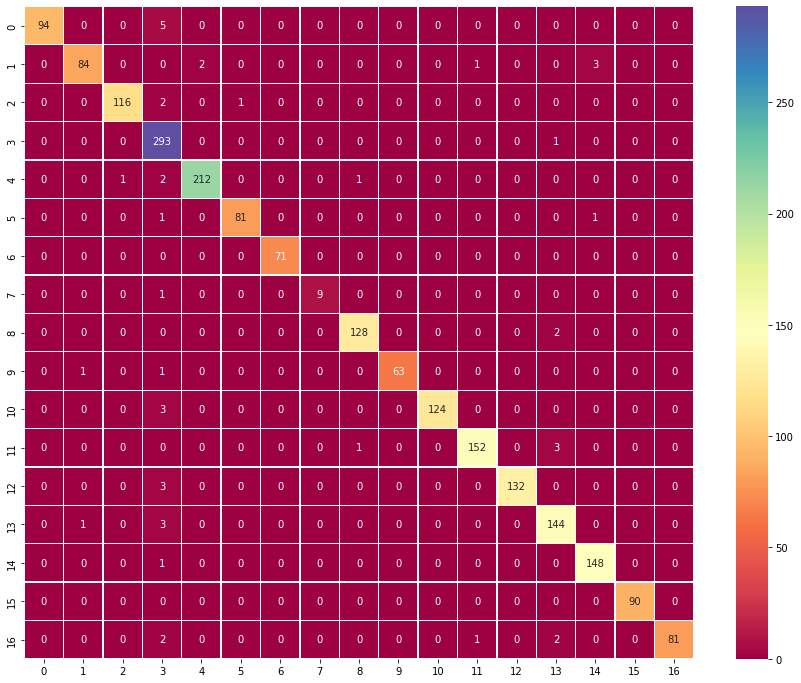

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot = True,fmt="d",cmap="Spectral", linewidths=.3 )
plt.show()

---
---
# *The 'predict' function*

We then declared a function called "predict" which will take "text" as a parameter and convert the text to words with the use of CountVectorizer. 

It predicts the language with the use of the language coloumn

In [25]:
def predict(text):
    x = cv.transform([text]).toarray() 
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print(lang[0]) 

##Few examples to showcase the working of the model

In [26]:
predict("Sneha Subramanian has worked on this project")

predict("sneha a travaillé sur ce projet")

predict("عملت سنيها في هذا المشروع")

predict("Sneha ha trabajado en este código")

predict("സ്നേഹ ഈ കോഡിൽ പ്രവർത്തിച്ചിട്ടുണ്ട്")

predict("Снеха работала над этим кодом")

English
French
Arabic
Spanish
Malayalam
Russian


##MANUALLY TESTING THE MODEL


Trial:

أهلا - Arabic

Hallo - Dutch

Bonjour - French

Hola - Spanish

---

Trial:

Verabschiedung - German

До свидания - Russian

பிரியாவிடை - Tamil

വിട - Malayalam

---

### Input a phrase here

In [27]:
a=input()

أهلا


### Detecting the language using function 'predict'

In [28]:
pl=predict(a)
pl

Arabic


---
# Translation
---
This section of the code will translate the user input into a user given language.

In [29]:
b=input()

Russian


Installing Dependencies

In [30]:
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 6.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [31]:
from deep_translator import GoogleTranslator

Translation Code

In [32]:
to_translate = a

if(b=="English" or b=="english"):
    translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
elif(b=="French" or b=="french"):
    translated = GoogleTranslator(source='auto', target='fr').translate(to_translate)
elif(b=="Arabic" or b=="arabic"):
    translated = GoogleTranslator(source='auto', target='ar').translate(to_translate)
elif(b=="Spanish" or b=="spanish"):
    translated = GoogleTranslator(source='auto', target='es').translate(to_translate)
elif(b=="German" or b=="german"):
    translated = GoogleTranslator(source='auto', target='de').translate(to_translate)
elif(b=="Portugese" or b=="portugese"):
    translated = GoogleTranslator(source='auto', target='pt').translate(to_translate)
elif(b=="russian" or b=="Russian"):
    translated = GoogleTranslator(source='auto', target='ru').translate(to_translate)
elif(b=="Sweedish" or b=="sweedish"):
    translated = GoogleTranslator(source='auto', target='sv').translate(to_translate)
elif(b=="Dutch" or b=="dutch"):
    translated = GoogleTranslator(source='auto', target='nl').translate(to_translate)
elif(b=="Turkish" or b=="turkish"):
    translated = GoogleTranslator(source='auto', target='tr').translate(to_translate)
elif(b=="Danish" or b=="danish"):
    translated = GoogleTranslator(source='auto', target='da').translate(to_translate)
elif(b=="Greek" or b=="greek"):
    translated = GoogleTranslator(source='auto', target='el').translate(to_translate)
elif(b=="Tamil" or b=="tamil"):
    translated = GoogleTranslator(source='auto', target='ta').translate(to_translate)
elif(b=="Hindi" or b=="hindi"):
    translated = GoogleTranslator(source='auto', target='hi').translate(to_translate)
elif(b=="Kannada" or b=="kannada"):
    translated = GoogleTranslator(source='auto', target='kn').translate(to_translate)
elif(b=="Malayalam" or b=="malayalam"):
    translated = GoogleTranslator(source='auto', target='ml').translate(to_translate)
elif(b=="Italian" or b=="italian"):
    translated = GoogleTranslator(source='auto', target='it').translate(to_translate)

print("The translation of ",a," to ",b," is ",translated)

The translation of  أهلا  to  Russian  is  Привет


---